In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

In [3]:
data = pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.shape

(768, 9)

In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


(array([300., 157.,  92.,  86.,  52.,  34.,  26.,  16.,   4.,   1.]),
 array([21., 27., 33., 39., 45., 51., 57., 63., 69., 75., 81.]),
 <BarContainer object of 10 artists>)

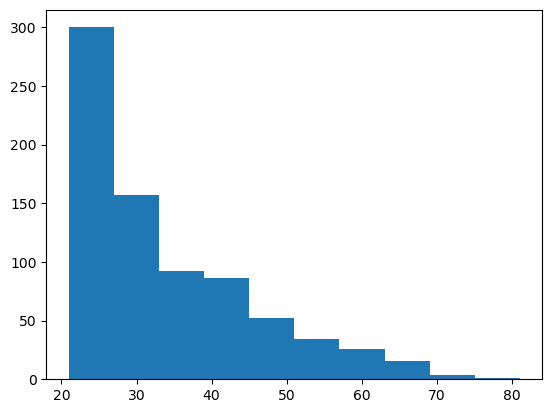

In [8]:
plt.hist(data.Age)

In [9]:
predictors_col = ["Pregnancies", "Glucose", "BloodPressure", "Insulin","BMI"]
target_col = ['Age']

In [10]:
predictors = data[predictors_col]
target = data[target_col]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=13)

In [12]:
tree = DecisionTreeClassifier()

In [13]:
arbol = tree.fit(X_train, y_train)

[Text(0.5167470260779616, 0.9772727272727273, 'x[0] <= 3.5\ngini = 0.958\nsamples = 614\nvalue = [48, 61, 30, 41, 37, 26, 24, 30, 22, 18, 17, 12\n13, 11, 8, 12, 17, 13, 8, 12, 18, 16, 12, 6\n12, 7, 4, 5, 4, 6, 7, 7, 3, 6, 2, 3, 5, 4\n2, 5, 1, 3, 3, 1, 4, 3, 1, 2, 1, 1]'),
 Text(0.247048681324664, 0.9318181818181818, 'x[4] <= 29.25\ngini = 0.913\nsamples = 337\nvalue = [46, 57, 27, 34, 34, 21, 17, 17, 13, 8, 6, 4, 4\n2, 3, 3, 2, 3, 1, 3, 3, 3, 1, 2, 2, 4, 1\n0, 0, 1, 0, 3, 2, 1, 0, 0, 0, 1, 2, 0, 0\n2, 1, 0, 1, 1, 0, 0, 1, 0]'),
 Text(0.07674838227974116, 0.8863636363636364, 'x[1] <= 98.5\ngini = 0.861\nsamples = 130\nvalue = [28, 32, 11, 12, 13, 4, 7, 4, 3, 1, 2, 1, 1\n1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0\n1, 0, 0, 0, 1, 0, 0, 1, 0]'),
 Text(0.037829766052762566, 0.8409090909090909, 'x[4] <= 22.15\ngini = 0.774\nsamples = 51\nvalue = [9, 20, 3, 3, 9, 1, 1, 1, 0, 0, 1, 0, 0, 0\n0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0

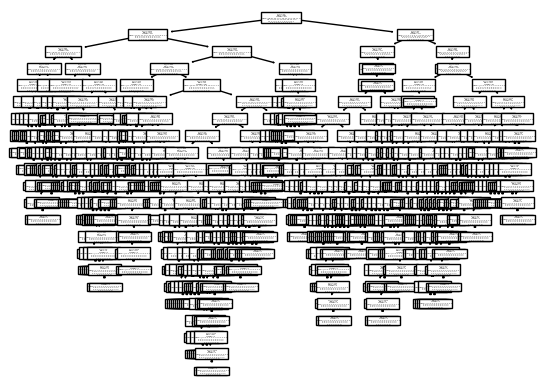

In [14]:
plot_tree(arbol)

In [15]:
predicciones = arbol.predict(X_test)

In [16]:
pd.crosstab(np.array([y[0] for y in y_test.values.tolist()]), predicciones, rownames=['Actual'], colnames=['Predicciones'])

Predicciones,21,22,23,24,25,26,27,28,29,30,...,51,52,54,56,57,62,63,65,66,67
Actual,,,,,,,,,,,,,,,,,,,,,
21,4,4,2,1,0,1,0,2,1,0,...,0,0,0,0,0,0,0,0,0,0
22,1,2,3,1,1,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
23,0,3,1,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
24,0,0,2,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
25,2,1,1,1,2,0,1,2,0,1,...,0,0,0,0,0,0,0,0,0,0
26,2,0,0,2,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
27,0,2,1,0,0,0,0,1,2,0,...,0,0,0,0,0,0,0,0,1,0
28,0,1,0,1,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
29,0,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
accuracy = accuracy_score(y_test,predicciones)
accuracy

0.07142857142857142